# Business Intelligence Lab 4 - Stars was data mining through NLP Text Analytics
Name : Ajay D Nair

## Loading Data and required functions

In [1]:
#import functions needed:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.sentiment import SentimentIntensityAnalyzer
from PIL import Image

In [2]:


# loading dataset
df4 = pd.read_csv("C:/Users/ajaxc/Downloads/Lab4_dataset/star_wars_movies_scripts/SW_EpisodeIV.txt",delimiter='\t', encoding='latin1')
df5 = pd.read_csv("C:/Users/ajaxc/Downloads/Lab4_dataset/star_wars_movies_scripts/SW_EpisodeV.txt",delimiter='\t', encoding='latin1')
df6 = pd.read_csv("C:/Users/ajaxc/Downloads/Lab4_dataset/star_wars_movies_scripts/SW_EpisodeVI.txt",delimiter='\t', encoding='latin1')

Loading episodes into their respective dataframes, defining that its delimited by tab and not by comma which is default. Additionally latin ancoding is mentioned to avoid error cause all datasets arenot in UTF8 format. however this dataset is.

In [3]:
# exploring the dataset
df4.head()

,"character ""dialogue"""
0,"1 ""THREEPIO"" ""Did you hear that? They've shut..."
1,"2 ""THREEPIO"" ""We're doomed!"""
2,"3 ""THREEPIO"" ""There'll be no escape for the Pr..."
3,"4 ""THREEPIO"" ""What's that?"""
4,"5 ""THREEPIO"" ""I should have known better than ..."


Dataset is loaded properly into one column which requires further cleaning

## Adding Episode column and preprocessing to form final dataset for analysis

In [4]:
# Load and clean Episode files
def load_and_clean(df, episode_label):
    df[['id', 'character', 'dialogue']] = df['''character "dialogue"'''].str.extract(r'^(\d+)\s+"([^"]+)"\s+"(.+)"$')
    df.drop(columns=['''character "dialogue"'''], inplace=True)
    df['episode'] = episode_label
    return df.dropna()

# Replace these paths with your own
df_iv = load_and_clean(df4, "IV")
df_v = load_and_clean(df5, "V")
df_vi = load_and_clean(df6, "VI")

df_all = pd.concat([df_iv, df_v, df_vi], ignore_index=True)

df_all.head()


,id,character,dialogue,episode
0,1,THREEPIO,Did you hear that? They've shut down the main...,IV
1,2,THREEPIO,We're doomed!,IV
2,3,THREEPIO,There'll be no escape for the Princess this time.,IV
3,4,THREEPIO,What's that?,IV
4,5,THREEPIO,I should have known better than to trust the l...,IV


Function is defined to split raw data into defined varibles like charchter, dialogue and a new episode column is added

## Charchters with most dialogues in every episode

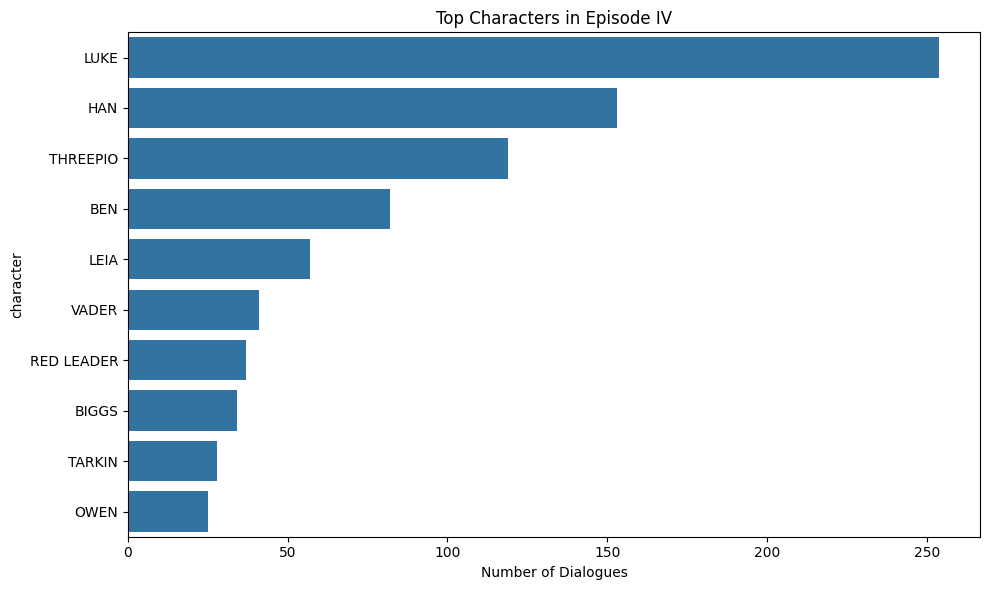

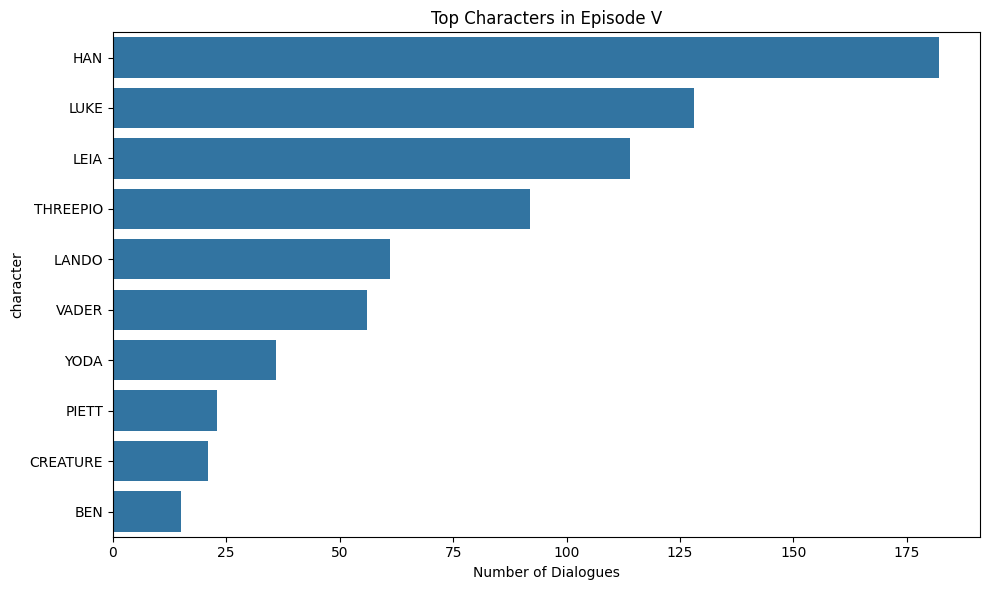

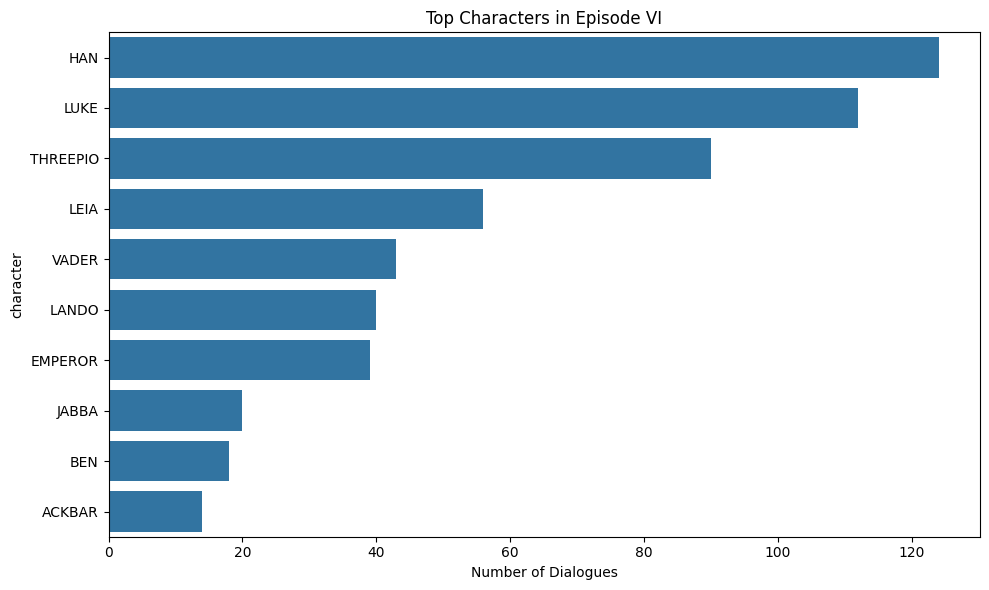

In [5]:
# Plot character counts
def plot_character_counts(df, episode_label):
    plt.figure(figsize=(10,6))
    counts = df[df['episode'] == episode_label]['character'].value_counts().head(10) # counts by top 10 charachters
    sns.barplot(x=counts.values, y=counts.index)
    plt.title(f'Top Characters in Episode {episode_label}')
    plt.xlabel('Number of Dialogues')
    plt.tight_layout()
    plt.show()

plot_character_counts(df_all, "IV")
plot_character_counts(df_all, "V")
plot_character_counts(df_all, "VI")



Episode 4 : From Sith clan only VADER is seen to have dialoues and LUKE from the Jedi clan. LUKE has highest number of dialogues with > 250 as count wheras VADER has less than 50 dialoges.
Episode 5 :LUKE is now 2nd highest in this episode with around 130 dialogues and YODA aroud 37 dialogues from the jedi clan. VADER from the sith cln with arond 55 dialogues.
Episode 6 : In the 6th epiode LUKE is again 2nd highest with arund 110 dialogues from jedi clan. VADER and EMPEROR with wround 40 dialogues is again less from the sith clan

From this we understand in all the three episodes charachters like HAN and LUKE from the good clan jedi had most f the dialogues showing posiiveness in the movie star wars more than negativeness.

## Frequency distribution of words before Cleaning Text DATA

<Axes: title={'center': 'Top 30 Words Before Cleaning'}, xlabel='Samples', ylabel='Counts'>

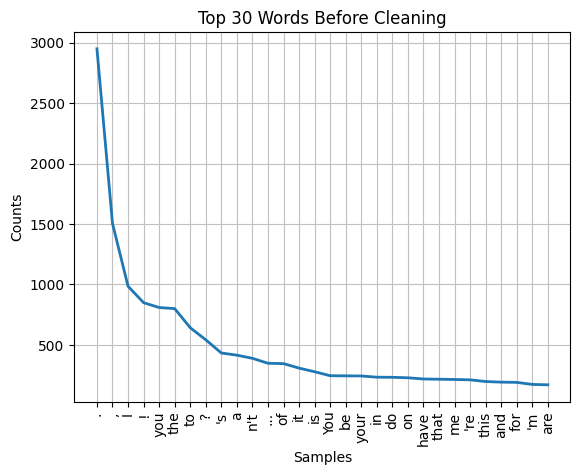

In [6]:
# Frequency Distribution (Raw)
all_text = " ".join(df_all['dialogue'])
tokens = nltk.word_tokenize(all_text)
fdist = nltk.FreqDist(tokens)
fdist.plot(30, title='Top 30 Words Before Cleaning')

We observe punctution marks are having the most counts and words also in the top 30 dont make quite sense.

## Frequency distribution of words after Cleaning Text DATA

<Axes: title={'center': 'Top 30 Words After Cleaning'}, xlabel='Samples', ylabel='Counts'>

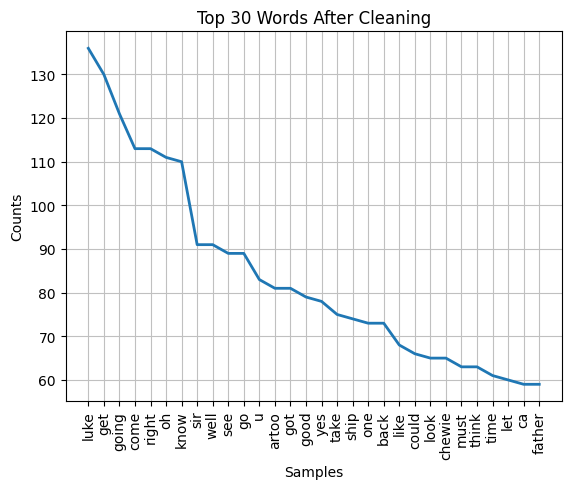

In [7]:
# Preprocessing
def preprocess(text):
    tokens = nltk.word_tokenize(text.lower())
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(word) for word in tokens if word.isalpha() and word not in stop_words]

df_all['new_script'] = df_all['dialogue'].apply(preprocess)

# Frequency Distribution (Cleaned)
clean_tokens = [word for sublist in df_all['new_script'] for word in sublist]
clean_fdist = nltk.FreqDist(clean_tokens)
clean_fdist.plot(30, title='Top 30 Words After Cleaning')

Now, we see better words which enter top 30 by usage count in dialogues.luke topping the charts as also had quite a lot of dialogues himself. The limitations of text analysis is also seen some wordslike artoo and chewie are vague and better trained models need to be applied to draw more meaning which is for further study.

In [8]:
df_all.head()

,id,character,dialogue,episode,new_script
0,1,THREEPIO,Did you hear that? They've shut down the main...,IV,"[hear, shut, main, reactor, destroyed, sure, m..."
1,2,THREEPIO,We're doomed!,IV,[doomed]
2,3,THREEPIO,There'll be no escape for the Princess this time.,IV,"[escape, princess, time]"
3,4,THREEPIO,What's that?,IV,[]
4,5,THREEPIO,I should have known better than to trust the l...,IV,"[known, better, trust, logic, thermocapsulary,..."


## Word Cloud

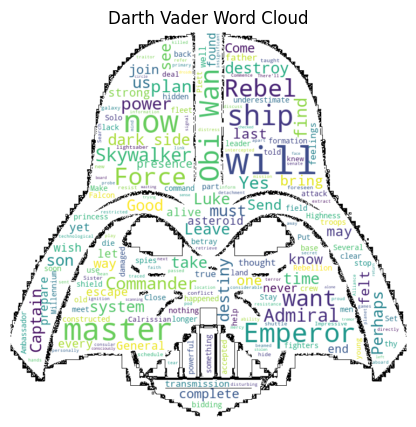

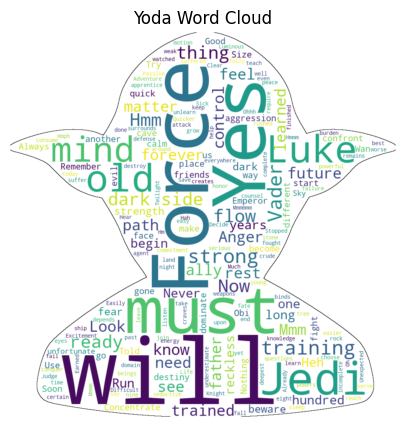

In [ ]:

# Word Cloud Function
def generate_wordcloud(text, title, mask_path=None):
    mask = np.array(Image.open(mask_path)) if mask_path else None
    wordcloud = WordCloud(width=800, height=400, background_color='white', mask=mask, contour_color='black', contour_width=1).generate(text)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

# image paths
vader = "C:/Users/ajaxc/Downloads/Lab4_dataset/wordcloud_masks/vader.jpg"
yoda = "C:/Users/ajaxc/Downloads/Lab4_dataset/wordcloud_masks/yoda.png"
# Usage with mask images
generate_wordcloud(" ".join(df_all[df_all['character'] == 'VADER']['dialogue']), "Darth Vader Word Cloud", mask_path= vader)
generate_wordcloud(" ".join(df_all[df_all['character'] == 'YODA']['dialogue']), "Yoda Word Cloud", mask_path= yoda)


The word cloud shows Yoda wordloud brings out related wrords with it like Jedi , LUKE, YES,training, strong, mind .Darth Vader wordloud also represents words calling out relations to him like rebel , commander , Admiral, Emperor, power.
BOth wordlods have similar words which form words which are biigest in wordloud like WILL, FORCE etc.
Overall Yoda wordloud signifies calmness, strength, training etc wheras Darth Vader wordcloud exemplifie power and name titles which show power. 

## Using TF-IDF to understand imortant words in Original Trilogy script(TEXT encoding)

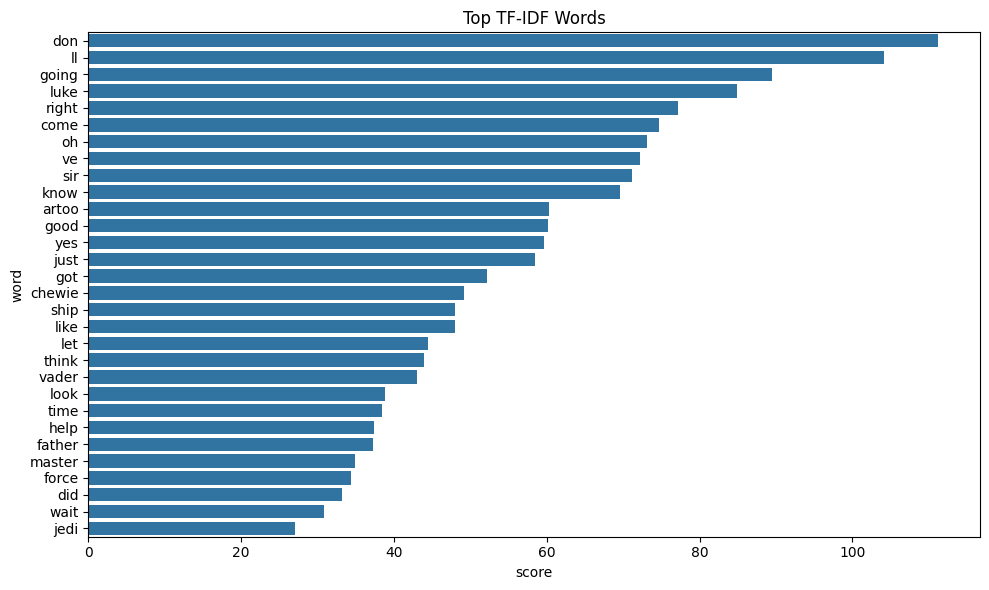

In [10]:
# TF-IDF
tfidf = TfidfVectorizer(stop_words='english', max_features=30)
X_tfidf = tfidf.fit_transform(df_all['dialogue'])
tfidf_words = tfidf.get_feature_names_out()
scores = X_tfidf.sum(axis=0).A1
tfidf_df = pd.DataFrame({'word': tfidf_words, 'score': scores})
tfidf_df = tfidf_df.sort_values(by='score', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(data=tfidf_df, x='score', y='word')
plt.title("Top TF-IDF Words")
plt.tight_layout()
plt.show()

Even this model couldnt get ridi of vague words like chewie and artoo

## Sentiment Analysis

In [11]:
# Sentiment Analysis
sia = SentimentIntensityAnalyzer()
df_all['sentiment'] = df_all['dialogue'].apply(lambda x: sia.polarity_scores(x)['compound'])

sith = ['VADER', 'EMPEROR']
jedi = ['YODA', 'LUKE']
sith_sentiment = df_all[df_all['character'].isin(sith)]['sentiment'].mean()
jedi_sentiment = df_all[df_all['character'].isin(jedi)]['sentiment'].mean()

print(f"Average Sith Sentiment: {sith_sentiment:.3f}")
print(f"Average Jedi Sentiment: {jedi_sentiment:.3f}")

Average Sith Sentiment: 0.047
Average Jedi Sentiment: 0.034


Vader sentiment analysis is used here. Its score anything < -0.05 = negative and anything > 0.05 is positive and anything in between is neutral. With sith clan having (VADER and EMPEROR) and Jedi clan havig (YODA and LUKE ) bot clans show neutral sentiment. This is due to YODA not having much dialogues. We are missing another jedi memeber HAN which when included gives a better score for jedi.

In [12]:
sith = ['VADER', 'EMPEROR']
jedi = ['YODA', 'LUKE', 'HAN']
sith_sentiment = df_all[df_all['character'].isin(sith)]['sentiment'].mean()
jedi_sentiment = df_all[df_all['character'].isin(jedi)]['sentiment'].mean()

print(f"Average Sith Sentiment: {sith_sentiment:.3f}")
print(f"Average Jedi Sentiment: {jedi_sentiment:.3f}")

Average Sith Sentiment: 0.047
Average Jedi Sentiment: 0.063


Yes the score for jedi clan now shows positive sentiment.

In [13]:
df_all.head()

,id,character,dialogue,episode,new_script,sentiment
0,1,THREEPIO,Did you hear that? They've shut down the main...,IV,"[hear, shut, main, reactor, destroyed, sure, m...",-0.6239
1,2,THREEPIO,We're doomed!,IV,[doomed],-0.6696
2,3,THREEPIO,There'll be no escape for the Princess this time.,IV,"[escape, princess, time]",-0.1280
3,4,THREEPIO,What's that?,IV,[],0.0000
4,5,THREEPIO,I should have known better than to trust the l...,IV,"[known, better, trust, logic, thermocapsulary,...",0.7351


Now lets check in detail why sith clan shows neutral rather than negative sentiment which is expected:-

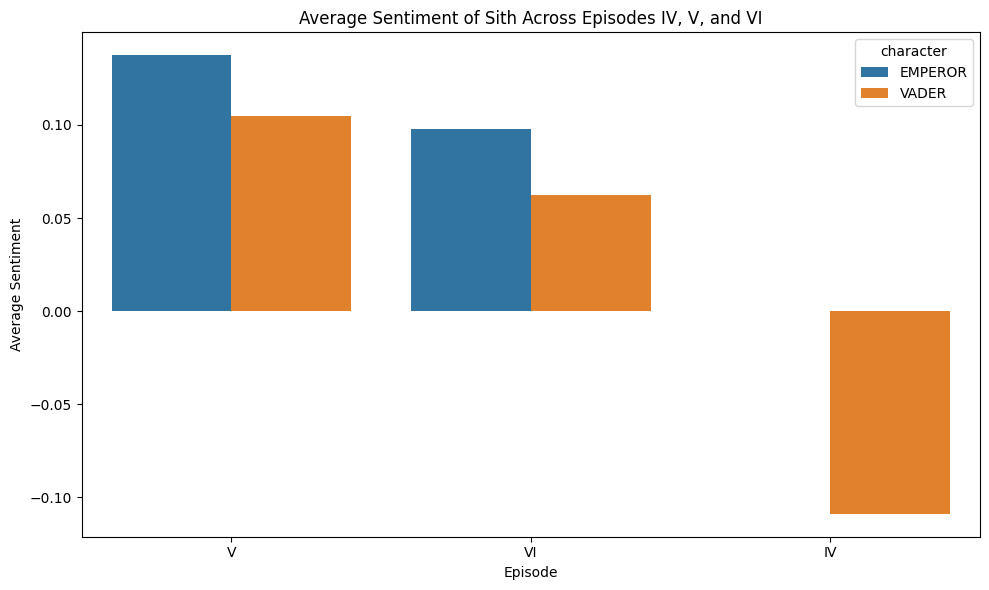

In [14]:

# Group by character and episode, then calculate average sentiment
grouped_sentiment = df_all.groupby(['character', 'episode'])['sentiment'].mean().reset_index()
grouped_sentiment_filtered = grouped_sentiment[grouped_sentiment['character'].isin (sith)]

# Plot the sentiment
plt.figure(figsize=(10, 6))
sns.barplot(data=grouped_sentiment_filtered, x='episode', y='sentiment', hue='character')
plt.title('Average Sentiment of Sith Across Episodes IV, V, and VI')
plt.xlabel('Episode')
plt.ylabel('Average Sentiment')
plt.tight_layout()
plt.show()


EMPEROR and VADER both have been recognised with neutral words in episode 4 and 5 and only in episode 6 does VADER says some negative words making it go < - 0.05 . However due to averaging overall sentiment remains neutral

Now lets check JEDI clans charcheter sentients over episodes :-

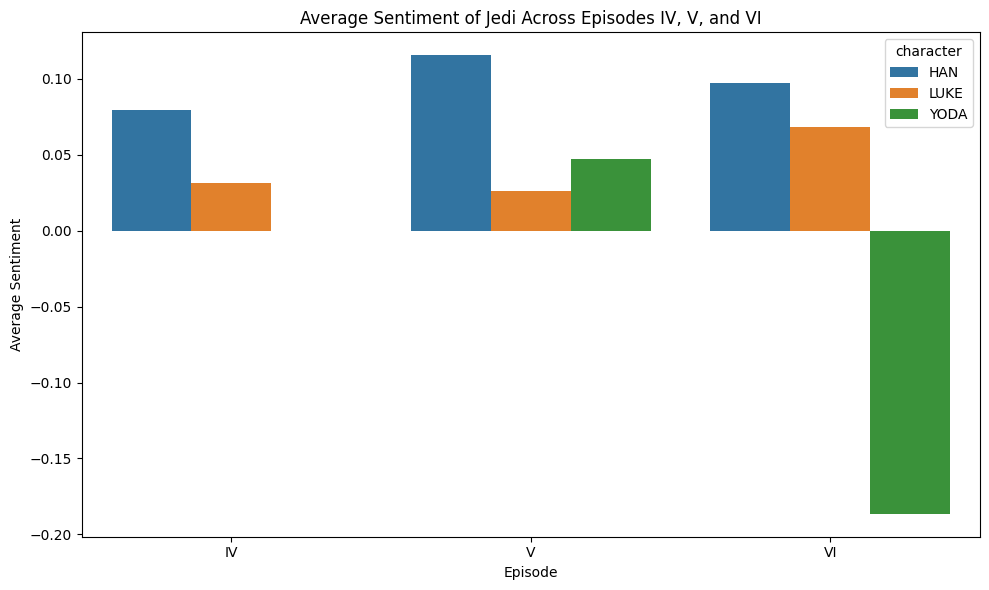

In [15]:
# Group by character and episode, then calculate average sentiment
grouped_sentiment = df_all.groupby(['character', 'episode'])['sentiment'].mean().reset_index()
grouped_sentiment_filtered = grouped_sentiment[grouped_sentiment['character'].isin (jedi)]

# Plot the sentiment
plt.figure(figsize=(10, 6))
sns.barplot(data=grouped_sentiment_filtered, x='episode', y='sentiment', hue='character')
plt.title('Average Sentiment of Jedi Across Episodes IV, V, and VI')
plt.xlabel('Episode')
plt.ylabel('Average Sentiment')
plt.tight_layout()
plt.show()

In every episode HAN has a positive sentiment , also as his dialogues were most. Luke has mostly neutral sentiment.YODA has neutral in episode 5 and also highly negative sentiment in episode 6. YODA skews the sentiment score originally when we did not include HAN. However Overall sentiment of JEDI clan is positive.

## CONCLUSION

- YODA is not trueto his clan and shows negative sentiment in episode 6 :D , however VADER is true to his clan showing negative sentiment in episode 6. 
- Overall JEDI clan shows positive sentiment from wordcloud and Vader sentiment analysis.

Text analysis is an amazing way of deducing sentiments from movie dialogues and overall shows a true picture however there need to be more research done into using models and maybe using better  machine learning models for text analysis like SOM.